# 200_RQ2

## Purpose
This will be the notebook where we present our results for our second RQ:

- "How does a founders education impact the amount of funding received by a startup?"

As mentioned in previous notebooks relating to this RQ, we decided to examine a founders education in terms of two main aspects:
- Highest Degree achieved by a founder
- Institution attended by a founder.

We will be creating our result visualisations based on these two main aspects and their relation to how much funding is received. 

In the final analysis notebook of this RQ (300_analysis_RQ2) we used funding intervals to split up founders into even groups. We did this to improve the accuracy of our results due to the large range of funding values in our dataset. We will be using these funding intervals when presenting our results in this notebook.

## Datasets
* _Input_: 300_analysis_RQ2.pkl
* _Output_: None

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib import cm
import seaborn as sns
import networkx as nx
pd.set_option('display.max_columns', None)
module_path = os.path.abspath(os.path.join('../../data/..'))
if module_path not in sys.path:
    sys.path.append(module_path)
%matplotlib inline

In [2]:
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_palette("muted")
sns.set_context("poster")

# Text, lines, and markers...
plt.rcParams['text.color'] = 'k'
plt.rcParams['axes.labelcolor'] = 'k'
plt.rcParams['axes.titlesize'] = 28
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22
plt.rcParams['lines.markersize'] = 15
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.fontsize'] = 22

## Importing dataset 2

This dataset contains information about each founder like their education and also details about the startup they founded. As mentioned in previous notebooks, the reason there are multiple person instances in our dataset is because: 
- A duplicate person instance if they have founded multiple companies.
- A duplicate person instance if they have changed positions in the same company.
- A duplicate person instance if they have attained another degree/changed institution while at the same company.

However, we do not see the need of merging these rows together as they would store too much information. Not only this, having the rows seperated makes it easier for our presentation of results for this RQ when looking at the Highest Degree and Institutions attended by the founders.

In [3]:
founders_df_raw = pd.read_pickle('../../data/analysis/300_analysis_RQ2.pkl')
founders_df_raw.shape

(44711, 55)

## Comparing Highest Degree of Founders

In our final analysis notebook of this RQ, we split the funding total achieved by founders into three main categories. We did this due to the large funding total ranges of startups e.g from 1000 USD to 10Million+ USD. 

As mentioned before, we did this to get a **more accurate insight** when comparing attributes with funding. These funding interval values chosen, split up the founders data evenly.

The 3 funding intervals we chose:
- **Interval one**: A founder of a company who has attained funding less than or equal to 1,000,000 USD
- **Interval two**: A founder of a company who has attained funding between 1,000,000 - 10,000,000 USD
- **Interval three**: A founder of a company who has attained funding greater than 10,000,000 USD

We will group our raw founders dataframe using the unique person id, the unique organisation id and the Highest Degree achieved by a founder. We do this for the reasons stated when importing dataset 2. We will also aggergate the first funding instance of a founder.

In [4]:
# grouping the raw founders dataframe and aggergating the funding total achieved by the founder to it.
org_grouped = founders_df_raw.groupby(['person_uuid','org_uuid','Highest_Degree'],as_index=False).agg({'funding_total_usd':'first'})
org_grouped.shape

(30064, 4)

The following block of code defines the boolean conditions that we will use when we want to filter the dataframe using a mask:

In [5]:
# Funding interval boolean conditions for our dataframe
Interval_1 = (org_grouped.funding_total_usd <= 1000000.0)
Interval_2 = ((org_grouped.funding_total_usd > 1000000.0) & (org_grouped.funding_total_usd <= 10000000.0))
Interval_3 = (org_grouped.funding_total_usd > 10000000.0)

**Next Step is normalizing the value counts for the Highest Degrees across each funding interval...**

We will multiply these normalised values to get the percentage.

In [6]:
# using the boolean conditions declared above to only count degree types of founders of interval one
interval1 = org_grouped[Interval_1].Highest_Degree.value_counts(normalize=True)*100
interval1

Bachelors      49.269197
Masters        40.586824
PhD             5.999127
Juris           1.145288
Diploma         0.676265
Doctorate       0.643543
certificate     0.589005
Honors          0.578098
Executive       0.512653
Name: Highest_Degree, dtype: float64

In [7]:
# using the boolean conditions declared above to only count degree types of founders of interval two
interval2 = org_grouped[Interval_2].Highest_Degree.value_counts(normalize=True)*100
interval2

Bachelors      44.637570
Masters        40.655143
PhD            10.438354
Juris           1.384777
certificate     0.754465
Doctorate       0.744915
Diploma         0.563461
Executive       0.467959
Honors          0.353357
Name: Highest_Degree, dtype: float64

In [8]:
# using the boolean conditions declared above to only count degree types of founders of interval three
interval3 = org_grouped[Interval_3].Highest_Degree.value_counts(normalize=True)*100
interval3

Masters        41.342926
Bachelors      38.340528
PhD            16.498801
Juris           1.419664
Doctorate       1.055156
certificate     0.575540
Diploma         0.306954
Honors          0.230216
Executive       0.230216
Name: Highest_Degree, dtype: float64

As seen from the series above, the values of Bachelors, Masters and PhD take up 95%+ of the total amount. We will thus be just using these degree types for our results. They very much dominate the different degree types we have and will give have a fair representation of the data.

**Next Step...**

We will now select the values for Bachelors, Masters and PhD for each funding interval and save them into respective list variables int1_vals (funding interval one founders), int2_vals... etc.. We will then get the sum of the remaining degree types and save them as the next value in the list. They will be known as 'Other' degree

In [9]:
# Saving values of degree types in relation to each funding interval
int1_vals = np.append(interval1.loc[['Bachelors','Masters','PhD']].values, interval1.loc[['Juris','Doctorate','certificate','Diploma','Honors','Executive']].values.sum())
int2_vals = np.append(interval2.loc[['Bachelors','Masters','PhD']].values, interval2.loc[['Juris','Doctorate','certificate','Diploma','Honors','Executive']].values.sum())
int3_vals = np.append(interval3.loc[['Bachelors','Masters','PhD']].values, interval3.loc[['Juris','Doctorate','certificate','Diploma','Honors','Executive']].values.sum())

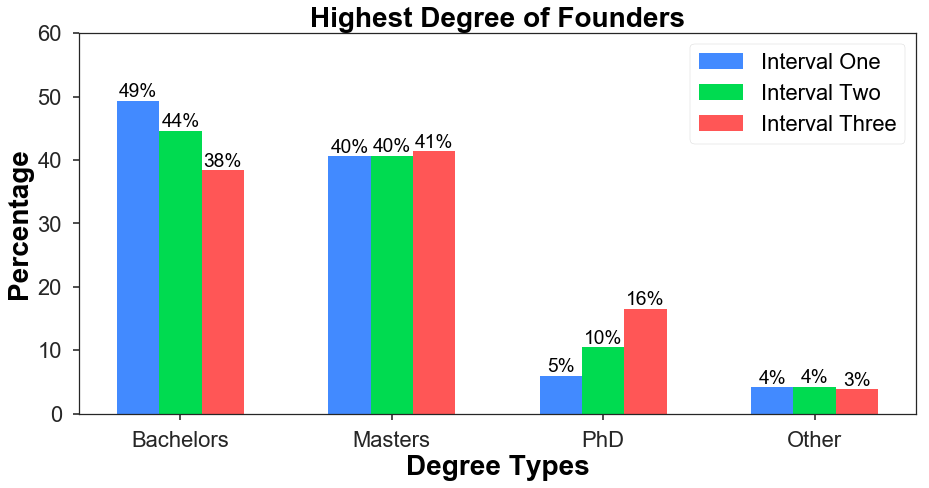

In [10]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
N = 4
ind = np.arange(N)  # the x locations for the groups
width = 0.2      # the width of the bars
rects1 = ax.bar(ind, int1_vals, width, color='#428aff')
rects2 = ax.bar(ind+width, int2_vals, width, color='#00db50')
rects3 = ax.bar(ind+width*2, int3_vals, width, color='#ff5656')
ax.set_ylabel('Percentage')
ax.set_xlabel('Degree Types')
ax.set_ylim(0,60)
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Bachelors', 'Masters', 'PhD', 'Other') )
ax.grid(False)
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Interval One', 'Interval Two', 'Interval Three'),frameon=True, ncol=1, loc='upper right' )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.*h, '%d%%'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.title("Highest Degree of Founders")
plt.show()

We realised once we made this visualisation that it is very overwhelming with information. 

We decided that the main idea we wanted to get across was the trends of these percentages as the funding intervals increased. Therefore, we decided that a line graph would more effectively show this. 

**Resulting line graph...**

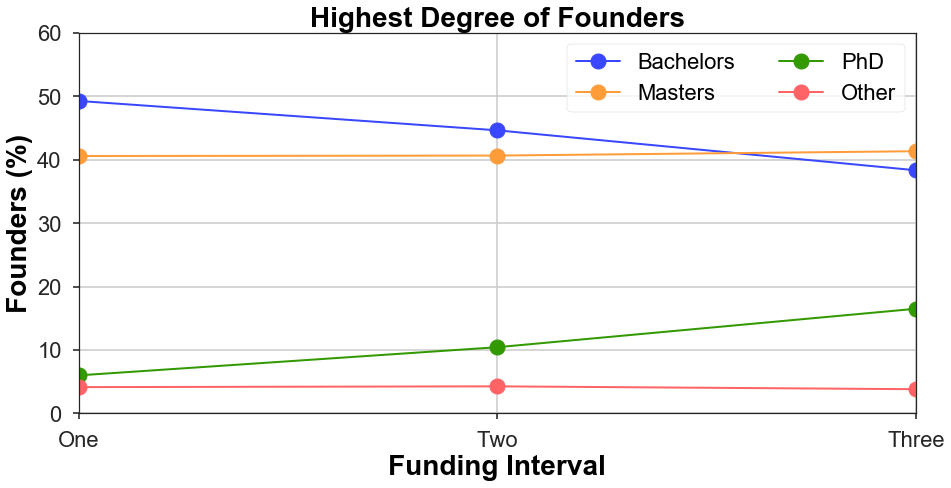

In [11]:
plt.figure(figsize=(15,7))

# Values of Bachelors, Masters, PhD saved in list
bach_vals = [interval1.loc['Bachelors'], interval2.loc['Bachelors'], interval3.loc['Bachelors']]
mst_vals = [interval1.loc['Masters'], interval2.loc['Masters'], interval3.loc['Masters']]
phd_vals = [interval1.loc['PhD'], interval2.loc['PhD'], interval3.loc['PhD']]
other_vals = [interval1.loc[['Juris','Doctorate','certificate','Diploma','Honors','Executive']].values.sum(),
              interval2.loc[['Juris','Doctorate','certificate','Diploma','Honors','Executive']].values.sum(),
              interval3.loc[['Juris','Doctorate','certificate','Diploma','Honors','Executive']].values.sum()]

plt.plot(bach_vals,marker='o',color='#3947ff')
plt.plot(mst_vals,marker='o',color='#ff9c3a')
plt.plot(phd_vals,marker='o',color='#329900')
plt.plot(other_vals,marker='o',color='#ff6366')

plt.title("Highest Degree of Founders")
plt.ylabel("Founders (%)")
plt.xlabel("Funding Interval")
plt.ylim(0,60)
plt.xticks(np.arange(3), ('One', 'Two', 'Three'))
plt.xlim(0,2)
plt.grid(True)
plt.legend(('Bachelors', 'Masters', "PhD", "Other"), frameon=True, loc='upper right', ncol=2)

**In Conclusion...**

We did consider using a stacked bar chart for this visualisation however it does not show the trend as effectively as a line graph in our opinion.

These two visualisations show that the Highest Degree attained by a founder does impact the amount of funding received. This is shown by the negative trend of the Bachelor Degree as the funding intervals increases. This contrasts hugely to the trend of the higher degrees Masters and PhD.

We did not expect the large percentage of founders with a Bachelors as their Highest Degree so this was very interesting.

## Comparing Top 10 Institutions of Founders

We will continue to use the funding intervals previously stated above when comparing the institutions that founders attended. 

We had noticed in our analysis that majority of founders had attended multiple institutions. We both believed that visualising the connections between these institutions would be most effective using a network graph. 

For our networks below:
- a **node** represents an **education institution** attended by a founder
- the **node size** is dependent on the **number of founders** attending these institutions
- an **edge** represents a founder who has **attended multiple** institutions e.g Bachelors in Harvard, Masters in Stanford


First of all we will group the founders by their unique person id, organisation id and the institution id. This will mean we will have all the institutions attended by founders even in the case when they have attended multiple educational institutions.

In [12]:
network_df = founders_df_raw.groupby(['person_uuid','org_uuid','institution_uuid'],as_index=False).agg({'funding_total_usd':'first','Highest_Degree':'first'})
network_df.head(5)

,person_uuid,org_uuid,institution_uuid,funding_total_usd,Highest_Degree
0,00026df9-9254-269d-40b1-549e9529550d,d2d0cb83-b874-c5d7-c7f7-fb77613cc95b,3e893a4c-f191-b42c-5dab-4785e07d3c75,1016992.0,PhD
1,00026df9-9254-269d-40b1-549e9529550d,d2d0cb83-b874-c5d7-c7f7-fb77613cc95b,Cambridge,1016992.0,PhD
2,000497ac-d3f9-7969-6c8b-b4050c8efc04,14658850-0cc9-15f8-62f3-a8c532ea6c61,922c1428-93c2-8e1e-cb37-327b83824426,8521954.0,Bachelors
3,000575b8-eac0-66b1-2a16-03c08c2b9f66,d2de0c01-397d-b4f1-8575-9b5e74e6b6b8,1eab62d2-15d9-0db7-930f-2aa77d4688e1,30000.0,Masters
4,0005da7e-2311-9002-7756-ed2f2734e057,2aec3826-0f75-1f21-326a-5dbca9d5ff15,9850bb11-7d5a-85c7-349c-a8977ef7fbac,7387100.0,Masters


**Looking at the value counts for the top 10 institutions in our dataframe...***

In [13]:
network_df.institution_uuid.value_counts().head(10)

Stanford    1682
Harvard     1364
MIT          966
UPenn        782
Berkeley     750
Tel Aviv     505
Cornell      487
Columbia     383
Yale         378
Carnegie     344
Name: institution_uuid, dtype: int64

**Next Step...**

We will be comparing the number of founders attendeding these top institutions for each of the funding intervals. The next code block declares two boolean conditions that we will use when masking our dataframe. 

- The first of these conditions **inst_cond** ensures that all instances in the dataframe are of founders who have attended the institutions that we have decoded.
- The second conditions **Interval_1, Interval_2 and Interval_3** will be used to select founders based on the amount of funding they have recieved.

We will used these boolean conditions to create three seperate dataframes **network1_df, network2_df and network3_df** which will visualised using a network.

In [14]:
# Boolean condition to select instances of founders that have attended decoded institutions
inst_cond =((network_df['institution_uuid']=='Stanford')|
            (network_df['institution_uuid']=='MIT')|
            (network_df['institution_uuid']=='Berkeley')|
            (network_df['institution_uuid']=='Harvard')|
            (network_df['institution_uuid']=='Tel Aviv')|
            (network_df['institution_uuid']=='Cornell')|
            (network_df['institution_uuid']=='UPenn')|
            (network_df['institution_uuid']=='Yale')|
            (network_df['institution_uuid']=='Columbia')|
            (network_df['institution_uuid']=='Carnegie'))

# Funding interval boolean conditions
Interval_1 = (network_df.funding_total_usd <= 1000000.0)
Interval_2 = ((network_df.funding_total_usd > 1000000.0) & (network_df.funding_total_usd <= 10000000.0))
Interval_3 = (network_df.funding_total_usd > 10000000.0)

**Creating 3 seperate dataframes using boolean conditions to be used for networks...**

In [15]:
# dataframe created using the boolean conditions. Only person_uuid and institution_uuid needed for network graph
network1_df = network_df[inst_cond & Interval_1][['person_uuid','institution_uuid']]
network1_df.shape

(1271, 2)

In [16]:
# dataframe created using the boolean conditions. Only person_uuid and institution_uuid needed for network graph
network2_df = network_df[inst_cond & Interval_2][['person_uuid','institution_uuid']]
network2_df.shape

(2557, 2)

In [17]:
# dataframe created using the boolean conditions. Only person_uuid and institution_uuid needed for network graph
network3_df = network_df[inst_cond & Interval_3][['person_uuid','institution_uuid']]
network3_df.shape

(3813, 2)

**Function used to draw the networks**

This function takes in three paramaters: the dataframe, desired node color and a string defining the funding interval for the title of the network.

In [18]:
def network_func(df, node_color, interval):
    plt.figure(figsize=(15,10)) # figure for network initialised
    plt.subplot(111)
    # defining dataframe and source+target columns
    g = nx.from_pandas_dataframe(df, source='person_uuid', target='institution_uuid')
    outdeg = dict(g.degree()) # dictionary of degrees of each node
    nodes_keep = [n for n in outdeg if outdeg[n] != 1] # nodes_keep defines the nodes we want to use for our visualisation
    h = g.subgraph(nodes_keep) # subgraph called 'h' created for all nodes that have a degree > 1
    # networkX spring layout created
    layout = nx.spring_layout(g,iterations=50,k=0.01)
    edgelist = [edge for edge in h.edges()] # edgelist created using the edges in 'h' (node degree > 1)
    nx.draw_networkx_edges(g, layout, edge_color='#686767', edgelist=edgelist) # edges drawn
    # institutions list created, unique instititutions are top 10 institutions decoded
    institutions = [node for node in g.nodes() if node in df.institution_uuid.unique()]
    size = [g.degree(node) * 25 for node in g.nodes() if node in df.institution_uuid.unique()]
    nx.draw_networkx_nodes(g, layout, nodelist=institutions, node_size=size, node_color=node_color)
    # labels of institutions drawn on nodes
    inst_dict = dict(zip(df.institution_uuid.unique(), df.institution_uuid.unique()))
    nx.draw_networkx_labels(g, layout, labels=inst_dict, font_weight='bold')
    # axis disabled and title given
    plt.axis('off')
    plt.title("Network of Top 10 institutions for Founders " + interval)

**Resulting Networks for each funding interval...**

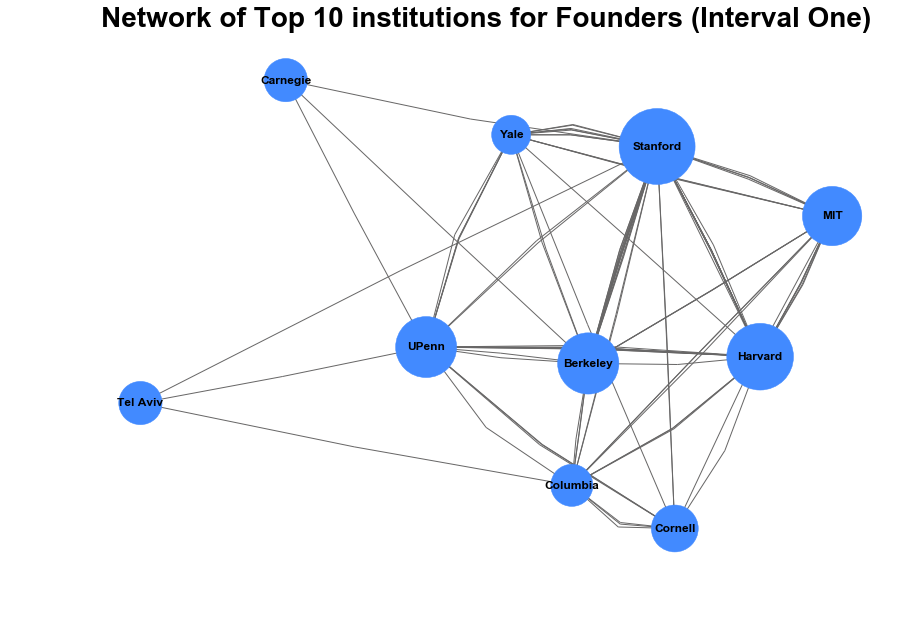

In [19]:
network_func(network1_df, '#428aff', '(Interval One)')

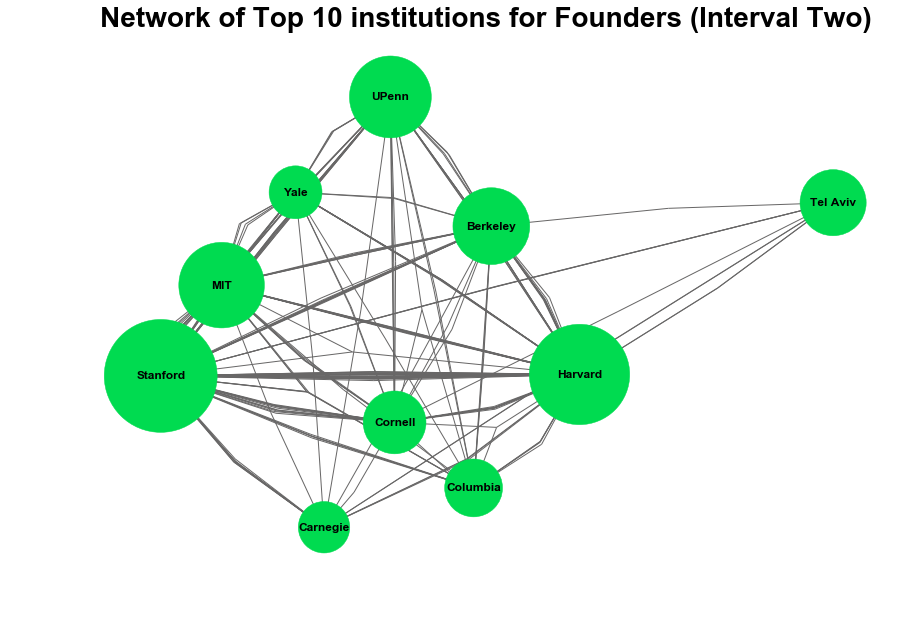

In [ ]:
network_func(network2_df, '#00db50', '(Interval Two)')

In [ ]:
network_func(network3_df, '#ff5656', '(Interval Three)')

**In conclusion from our networks...**

When we compare each of the networks, we can see visually that the network founders of the third funding interval (>10Million USD) have a lot more connections to the top institutions. 

There are a lot of distinct paths for this funding interval and the node sizes are all very large. 

There is a huge contrast between all these networks which would indicate that attending these top institutions does impact the amount of funding recieved.

# Overall Conclusion
## Does a founders education impact the amount of funding received by a startup?
     
* From our visualisations, we are able to conclude that a founders education does have an impact on the funding recieved by a startup.

* In terms of a the Highest Degree acheived by a founder:
    * Having a Bachelors as your Highest Degree does not hinder the your chance of getting a large amount of funding as much as we might have expected before analysing this RQ.
    * Attaining a Masters Degree as a Highest Degree of a founder is seen to be the most consistent degree across the funding intervals we explored.

* In terms of the institution which the founder attended:
    * Having attended one/multiple of the top institutions like Stanford, Harvard, MIT, UPenn or Berkeley is shown to have a positive effect on the amount of funding recieved. 